<a href="https://colab.research.google.com/github/AhmedHeshamSakr/ML-Models-Comparison-and-Evaluation-/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
!pip install seaborn
!pip install scikit-learn

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 71.0MB/s]


In [ ]:
import zipfile


file_path = '/content/titanic.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle/titanic')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
!pip install seaborn
!pip install scikit-learn

In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/train.csv')


In [ ]:
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<ipython-input-30-2f428ec4661c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap="inferno")


<Axes: >

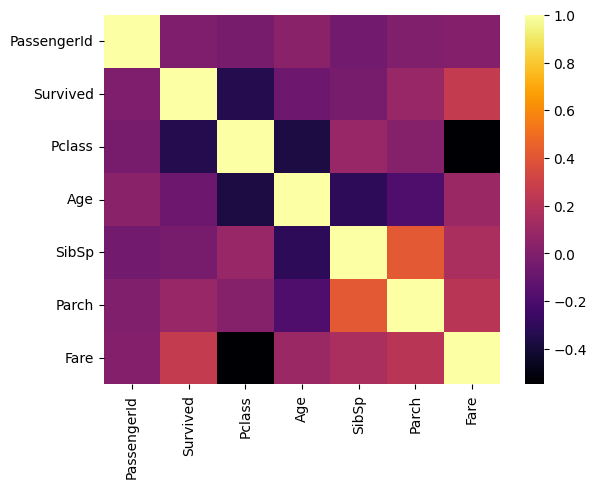

In [ ]:
sns.heatmap(titanic_data.corr(), cmap="inferno")

In [ ]:
# Define features and labels
features = titanic_data.drop('Survived', axis=1)
labels = titanic_data['Survived']

#the first split (training and test)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_indices, test_indices in splitter.split(features, labels):
    train_set = titanic_data.loc[train_indices]
    test_set = titanic_data.loc[test_indices]

#split the training set into training and validation
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_indices, valid_indices in splitter.split(train_set, train_set[["Survived", "Pclass", "Sex"]]):
    train_set = titanic_data.loc[train_indices]
    valid_set = titanic_data.loc[valid_indices]

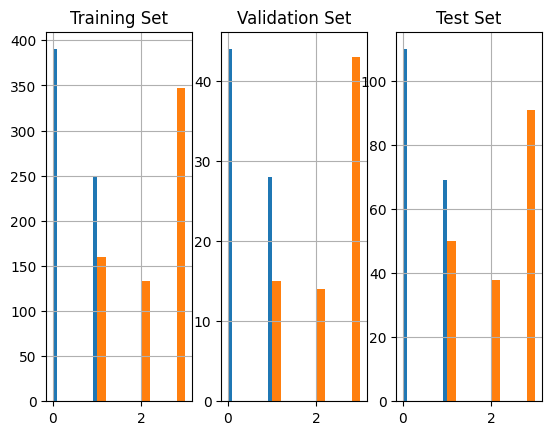

In [ ]:
plt.subplot(1, 3, 1)
train_set['Survived'].hist()
train_set['Pclass'].hist()
plt.title('Training Set')

plt.subplot(1, 3, 2)
valid_set['Survived'].hist()
valid_set['Pclass'].hist()
plt.title('Validation Set')

plt.subplot(1, 3, 3)
test_set['Survived'].hist()
test_set['Pclass'].hist()
plt.title('Test Set')

plt.show()


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 581 to 355
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  640 non-null    int64  
 1   Survived     640 non-null    int64  
 2   Pclass       640 non-null    int64  
 3   Name         640 non-null    object 
 4   Sex          640 non-null    object 
 5   Age          510 non-null    float64
 6   SibSp        640 non-null    int64  
 7   Parch        640 non-null    int64  
 8   Ticket       640 non-null    object 
 9   Fare         640 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     639 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 65.0+ KB


In [ ]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X


In [ ]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        # One-hot encode 'Sex' column
        sex_encoder = OneHotEncoder()
        sex_matrix = sex_encoder.fit_transform(X[['Sex']]).toarray()
        sex_column_names = ["Female", "Male"]

        for i in range(len(sex_matrix.T)):
            X[sex_column_names[i]] = sex_matrix.T[i]


        return X

In [ ]:
class FeatureDropper (BaseEstimator, TransformerMixin) :
    def fit (self, X, Y=None) :
        return self
    def transform (self, X) :
        return X.drop (["Embarked", "Name", "Ticket", "Cabin", "Sex", "N", "PassengerId"], axis=1 , errors="ignore" )

In [ ]:
preprocessing_pipeline = Pipeline([
    ("AgeImputer", AgeImputer()),
    ("FeatureEncoder", FeatureEncoder()),
    ("FeatureDropper", FeatureDropper()),
    ("Scaler", StandardScaler())
])

In [ ]:
X_train_processed = preprocessing_pipeline.fit_transform(train_set)
X_valid_processed = preprocessing_pipeline.transform(valid_set)
X_test_processed = preprocessing_pipeline.transform(test_set)

In [ ]:
#training
X_train = train_set.drop(['Survived'], axis=1)
y_train = train_set['Survived']
y_train_data = y_train.to_numpy()

#validation
X_valid = valid_set.drop(['Survived'], axis=1)
y_valid = valid_set['Survived']
y_valid_data = y_valid.to_numpy()

#test
X_test = test_set.drop(['Survived'], axis=1)
y_test = test_set['Survived']
y_test_data = y_test.to_numpy()


X_train_data = preprocessing_pipeline.fit_transform(X_train)
X_valid_data = preprocessing_pipeline.transform(X_valid)
X_test_data = preprocessing_pipeline.transform(X_test)


In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
      self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
      # Convert y to integer type
      y = y.astype(int)
      self.root = self._grow_tree(X, y)


    def _grow_tree(self, X, y, depth=0):
      n_samples, n_feats = X.shape
      n_labels = len(np.unique(y))

      # check the stopping criteria
      if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
          if n_samples == 0:
              # If there are no samples, return a leaf node with a default value
              return Node(value=self._default_value())
          leaf_value = self._most_common_label(y)
          return Node(value=leaf_value)

      feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

      # find the best split
      best_feature, best_thresh = self._best_split(X, y, feat_idxs)

      # create child nodes
      left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
      left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
      right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
      return Node(best_feature, best_thresh, left, right)

    def _default_value(self):
      # You can modify this to return a default value for an empty node
      # For classification problems, it might be the majority class in the entire dataset
      # For regression problems, it might be the mean of the target values
      return None  # Change this according to your problem



    def _best_split(self, X, y, feat_idxs):
      best_gain = -1
      split_idx, split_threshold = None, None

      for feat_idx in feat_idxs:
          X_column = X[:, feat_idx]
          thresholds = np.unique(X_column)

          for thr in thresholds:
              # calculate the information gain
              gain = self._information_gain(y, X_column, thr)

              if gain > best_gain:
                  best_gain = gain
                  split_idx = feat_idx
                  split_threshold = thr

      # Set a default threshold if no valid split is found
      if split_threshold is None:
          split_threshold = 0.0  # You can choose a suitable default value

      return split_idx, split_threshold



    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
      if node.is_leaf_node():
          return node.value if node.value is not None else self._default_prediction()

      if node.threshold is not None and x[node.feature] <= node.threshold:
          return self._traverse_tree(x, node.left)
      elif node.threshold is not None:
          return self._traverse_tree(x, node.right)
      else:
          # Handle the case where node.threshold is None
          # You might want to return a default value or raise an exception
          return self._default_prediction()
    def predict_proba(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _default_prediction(self):
        # You can modify this to return a default prediction value
        # For binary classification, it might be 0 or 1
        # For multiclass classification, it might be the majority class
        return 0  # Change this according to your problem




In [ ]:
if __name__ == "__main__":

    nb = DecisionTree()
    nb.fit(X_train_data.astype(np.float64), y_train_data.astype(np.float64))

    # Training accuracy
    predictions_train = nb.predict(X_train_data.astype(np.float64))
    accuracy_train = np.sum(predictions_train == y_train_data.astype(np.float64)) / len(y_train_data)
    print("Training Accuracy:", accuracy_train)

    # Validation accuracy
    predictions_valid = nb.predict(X_valid_data.astype(np.float64))
    accuracy_valid = np.sum(predictions_valid == y_valid_data.astype(np.float64)) / len(y_valid_data)
    print("Validation Accuracy:", accuracy_valid)

    # Testing accuracy
    predictions_test = nb.predict(X_test_data.astype(np.float64))
    accuracy_test = np.sum(predictions_test == y_test_data.astype(np.float64)) / len(y_test_data)
    print("Testing Accuracy:", accuracy_test)

Training Accuracy: 0.9796875
Validation Accuracy: 0.7222222222222222
Testing Accuracy: 0.9329608938547486


In [ ]:
print("Shapes:", y_valid_data.shape, len(predictions_valid))
# Evaluate the model on the validation set
accuracy = accuracy_score(y_valid_data, predictions_valid)
print(f'Accuracy on the validation set: {accuracy:.2f}')
# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_valid_data, predictions_valid))
print("\nClassification Report:")
print(classification_report(y_valid_data, predictions_valid))

Shapes: (72,) 72
Accuracy on the validation set: 0.72
Confusion Matrix:
[[34 10]
 [10 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        44
           1       0.64      0.64      0.64        28

    accuracy                           0.72        72
   macro avg       0.71      0.71      0.71        72
weighted avg       0.72      0.72      0.72        72



In [ ]:
print("Shapes:", y_test_data.shape, len(predictions_test))
# Evaluate the model on the Testing set
accuracy = accuracy_score(y_test_data, predictions_test)
print(f'Accuracy on the testing set: {accuracy:.2f}')
# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_data, predictions_test))
print("\nClassification Report:")
print(classification_report(y_test_data, predictions_test))

Shapes: (179,) 179
Accuracy on the testing set: 0.93
Confusion Matrix:
[[102   8]
 [  4  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       110
           1       0.89      0.94      0.92        69

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179



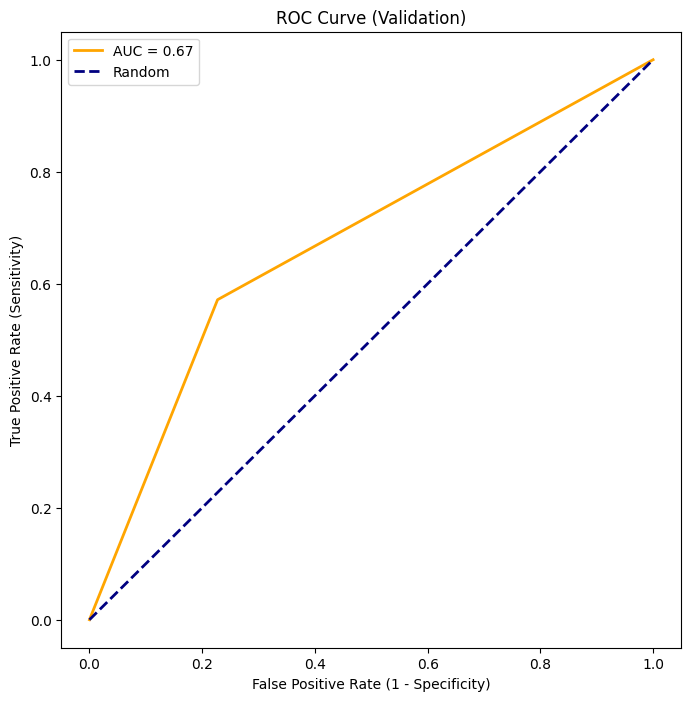

In [ ]:
if __name__ == "__main__":
    nb = DecisionTree()
    nb.fit(X_train_data.astype(np.float64), y_train_data.astype(np.float64))

    # Get predicted probabilities for the positive class (class 1)
    y_valid_probs = nb.predict_proba(X_valid_data)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_valid_data, y_valid_probs)
    auc = roc_auc_score(y_valid_data, y_valid_probs)

    # Plot ROC Curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve (Validation)')
    plt.legend()
    plt.show()


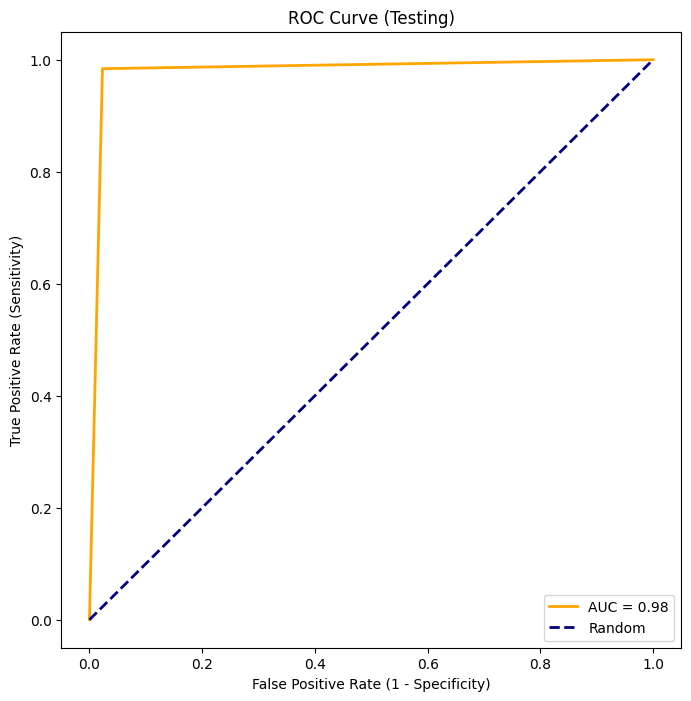

In [ ]:
if __name__ == "__main__":
    nb = DecisionTree()
    nb.fit(X_train_data.astype(np.float64), y_train_data.astype(np.float64))

    # Get predicted probabilities for the positive class (class 1)
    y_train_probs = nb.predict_proba(X_train_data)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_train_data, y_train_probs)
    auc = roc_auc_score(y_train_data, y_train_probs)

    # Plot ROC Curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve (Testing)')
    plt.legend()
    plt.show()
